In [6]:
!pip install easyocr


In [7]:
import easyocr
from PIL import Image, ImageDraw, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'], gpu=True)


In [8]:
from google.colab import files

uploaded = files.upload()


Saving meme_4.jpg to meme_4 (1).jpg
Saving meme_3.jpg to meme_3 (1).jpg
Saving meme_2.jpg to meme_2 (1).jpg
Saving meme_1.jpg to meme_1 (1).jpg


In [ ]:
image_paths = list(uploaded.keys())

for path in image_paths:
    print(f"\nExtracted text from {path}:")

    img = Image.open(path).convert("L")
    img = img.resize((img.width * 2, img.height * 2))

    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(2.0)

    img_np = np.array(img)

    results = reader.readtext(img_np)

    for bbox, text, confidence in results:
        if confidence > 0.5:
            print(text)



Extracted text from meme3.jpg:
me
panicking over due dates and then
panicking over lack of time and then
panicking because i'm panicking

Extracted text from meme2.jpg:
Food gives You energy"
after eating:

Extracted text from meme1 (1).jpg:
[benvoustarpour assignmentan hour
getingamA


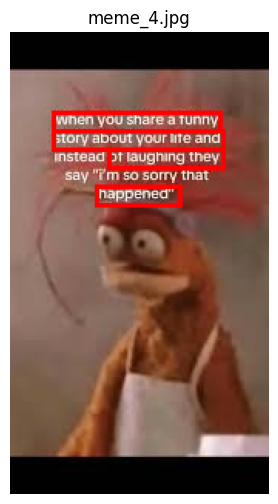

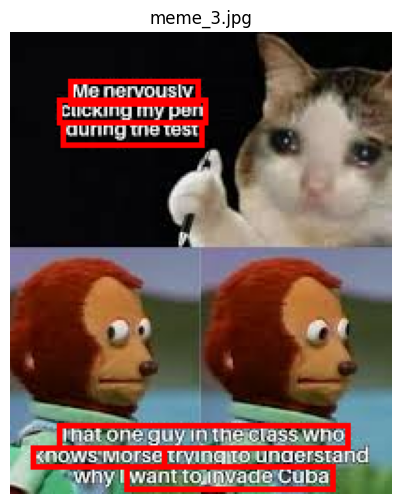

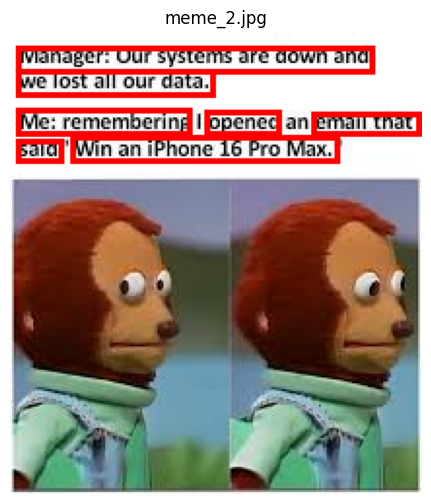

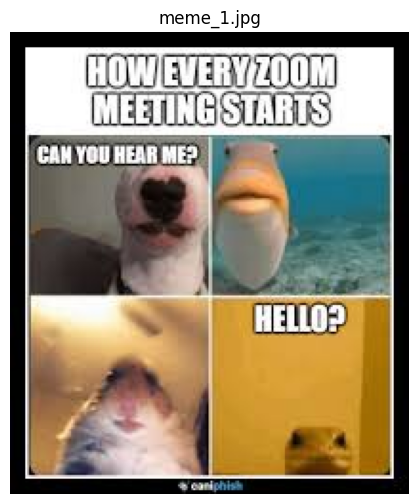

In [9]:
for path in image_paths:
    img = Image.open(path).convert("RGB")
    draw = ImageDraw.Draw(img)

    results = reader.readtext(np.array(img))

    for bbox, text, confidence in results:
        if confidence > 0.5:
            top_left = tuple(bbox[0])
            bottom_right = tuple(bbox[2])
            draw.rectangle([top_left, bottom_right], outline="red", width=3)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(path)
    plt.show()
